In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score   
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from numpy.random import *
import random
from sklearn.svm import SVC

In [38]:
class ScratchSVMClassifier():
    
    def __init__(self, num_iter, lr, Threshold):
        self.iter = num_iter
        self.lr = lr
        self.Threshold = Threshold
        
    def _SVC_hypothesis(self, x, y):
        y = y.reshape(-1,1)
        for i in range (y.shape[0]):
            temp = 0
            for j in range(len(y)):
                temp += self.lamda_[j] * y[i] * y[j] * np.dot(x[i].T, x[j])
            self.lamda_[i] += self.lr * (1 - temp)
            self.lamda_[self.lamda_ <= 0] = 0
        return self.lamda_
    def fit(self, x, y, x_val=None, y_val=None):
        np.random.seed(0)
        self.lamda_ = np.random.rand(x.shape[0], 1) * 0.03
        
        for i in range(self.iter):
            self._SVC_hypothesis(x, y)
            
        self.index_l = []
        for j, i in enumerate(self.lamda_):
            if i > self.Threshold:
                self.index_l .append(j)
            self.lamda_sv = self.lamda_[self.index_l]
            self.x_sv = x[self.index_l]
            self.y_sv = y[self.index_l]
            
    def predict(self, x):
        self.y_pred = 0
        for i in range(self.lamda_sv.shape[0]):
            self.y_pred += self.lamda_sv[i] * self.y_sv[i] * np.dot(x, self.x_sv[i].T)
        self.y_pred = np.where(self.y_pred > 0, 1, -1)
        return self.y_pred

In [3]:
iris = load_iris()
x = iris.data[50:,:]
y = iris.target[50:]
x = x[:,[2,3]]
y[y==2] = -1

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.3, random_state=0)

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train1 = scaler.transform(x_train)
x_test1 = scaler.transform(x_test)

In [7]:
SV = ScratchSVMClassifier(num_iter=10000, lr=0.01, Threshold=0.038)
SV.fit(x_train1,y_train)
y_pred = SV.predict(x_test1)

In [8]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

1.0
0.9333333333333333
[[15  0]
 [ 1 14]]


In [36]:
def decision_region(x, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor','virginica']):
    
    #setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.min(x[:,0])-0.5, np.max(x[:,0])+0.5, step), np.arange(np.min(x[:,1])-0.5, np.max(x[:,1])+0.5, step)
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    #plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(x[y==target][:, 0], x[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    if model==SV:
        plt.scatter(SV.x_sv[:, 0], SV.x_sv[:, 1], s=80, color='yellow', marker='o')
    else:
        plt.scatter(x_train[svc.support_, 0], x_train[svc.support_, 1], s=80, color='yellow', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show();

In [17]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

x = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
x = x[random_index]
y = y[random_index]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

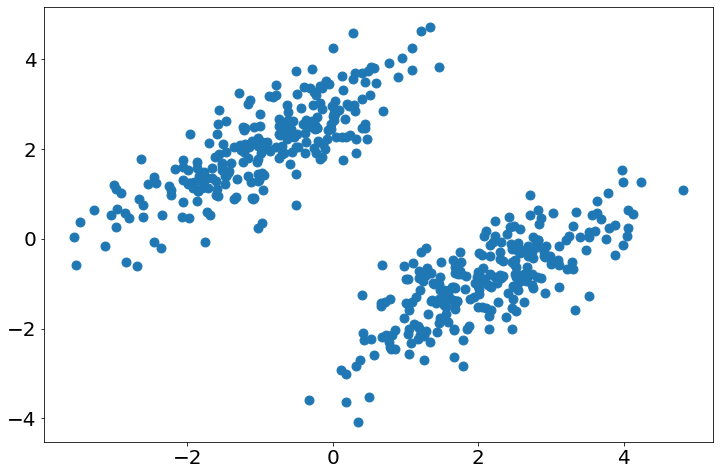

In [18]:
fig =  plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(x[:,0],x[:,1],s=80);

In [33]:
svc = SVC(random_state=0, C=1e10, kernel='linear')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

In [ ]:
decision_region(x_train, y_train, svc, title='TRAIN');

In [20]:
svc_pred

array([ 1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1,  1])